<center><font size=4> Université Catholique de Louvain </center>
 <h1><center><font size=5> LPHYS1303 - Simulation Numérique en Physique </center></h1>
 <h1><center><font size=6> Projet Différences Finies : Soliton & KdV Equation </center></h1>
 <h1><center><font size=4>
     Duynslaeger Sacha : 50951900 <br>
     Léonard Guillaume : 16321800 <br>
     </center></h1>

<img src="figures/ucl.png" width = "200">

__________________________
<br> <br>

# <font size=5> 0. Introduction <br> </font>
***
L'objectif de ce projet est d'illustrer un certain phénomène de propagation d'onde se déplaçant à une vitesse proportionnelle à sa hauteur et interagissant non destructivement avec un autre paquet d'onde. Ce phénomène porte le nom de soliton et se produit pour les vagues en faible profondeur. L'équation dont ces solitons sont solutions est la suivante: <br>

<center> $\Large \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + \delta^2\frac{\partial^3 u}{\partial x^3} = 0. $  <br> </center>

Cette équation, dénommée l'équation de Korteweg-de Vries (KdV), décrit donc l’évolution de la hauteur $u$ d’un fluide peu profond en fonction du temps, en tenant compte des effets d’advection, de gradient de pression (derivée première dans l’espace) et de dissipation visqueuse (derivée troisième). <br>

Pour simuler correctement ce modèle mathématique de façon numérique, il faut tout d'abord choisir un schéma numérique. Dans ce projet, deux schémas sont étudiés: un schéma Upwind et un schéma leap-frog (proposé par Zabusky et Kruskal). Le schéma Upwind est analysé pour en déterminer sa consistance, son stencil et ses conditions de stabilité. Quant au schéma leap-frog, sa consistance et son ordre de convergence sont démontrés. Par la suite, un dépassement d’une onde lente par une onde rapide est illustré grâce à un code Python. Pour conclure, une discussion des choix et des résultats de cette simulation est effectuée.

<br>

# <font size=5> 1. Schéma Upwind <br> </font>
***
Formulation discrète : <br><br>

Considérant le fait que la vague se déplace vers la droite (comme expliqué dans l'énoncé), nous avons $u > 0$ ce qui nous permet d'obtenir : <br><br>
$$u_{i,j+1} = u_{i,j} - \frac{\Delta t}{\Delta x}u_{i,j}
    (u_{i,j} - u_{i-1,j}) - \delta^2\frac{\Delta t}{2(\Delta x)^3}(u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j})$$
<br>

Avec les $i$ étant les indices spaciaux et les $j$ les indices temporels. <br>

Pour la suite, nous utiliserons $k = \Delta t$ et $h = \Delta x$ <br><br>


## <font size=4> 1.1 Démonstration de la formule discrète <br> </font>

Pour passer de la formulation forte du problème à la formulation discrète, nous allons utiliser le théorème de Taylor-Young qui stipule qu'une fonction $f$ n-fois dérivable peut être approchée autour du point x par : <br>
$$f(x+a) = \sum_{k = 0}^{n} \frac{f^{(k)}(x)}{k!}a^k + R_n(a)$$
avec $R_n(a)$ le reste. <br><br>

Nous allons poser que $u(x,t) = u_{i,j}$, ce qui nous permet d'écrire pour le schéma numérique que $u(x + h,t) = u_{i+1,j}$. <br> En utilisant le théorème de Taylor-Young, on prouve que : <br>
$$u_{i+1,j} = u_{i,j} + h \frac{du}{dx} + ... + h^n\frac{1}{n!}\frac{d^n u}{dt^n} + R_n(h)$$ <br>

Ce qui nous sera utile pour discrétiser chaque terme de la formulation forte l'équation de KdV. <br><br>

- $\Large\frac{du}{dt}$: 
$$u_{i,j+1} = u_{i,j} + k \frac{du}{dt} + \mathcal{O}(k^2)$$ <br>
$$\Leftrightarrow \frac{du}{dt} = \frac{u_{i,j+1} - u_{i,j}}{k} + \mathcal{O}(k)$$  <br>

- $\Large\frac{du}{dx}$: 
$$u_{i-1,j} = u_{i,j} - h \frac{du}{dx} + \mathcal{O}(h^2)$$ <br>
$$\Leftrightarrow \frac{du}{dx} = \frac{u_{i,j} - u_{i-1,j}}{h} + \mathcal{O}(h)$$ <br>

- $\Large\frac{d^3u}{dx^3}$: 
$$u_{i+2,j} = u_{i,j} + 2h \frac{du}{dx} + \frac{(2h)^2}{2!} \frac{d^2u}{dx^2} + \frac{(2h)^3}{3!} \frac{d^3u}{dx^3} + \frac{(2h)^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{1.1}$$<br> 
    
$$u_{i+1,j} = u_{i,j} + h \frac{du}{dx} + \frac{h^2}{2!} \frac{d^2u}{dx^2} + \frac{h^3}{3!} \frac{d^3u}{dx^3} + \frac{h^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{1.2}$$ <br>

$$u_{i-1,j} = u_{i,j} - h \frac{du}{dx} + \frac{h^2}{2!} \frac{d^2u}{dx^2} - \frac{h^3}{3!} \frac{d^3u}{dx^3} + \frac{h^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{1.3}$$<br>

$$u_{i-2,j} = u_{i,j} - 2h \frac{du}{dx} + \frac{(2h)^2}{2!} \frac{d^2u}{dx^2} - \frac{(2h)^3}{3!} \frac{d^3u}{dx^3} + \frac{(2h)^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{1.4}$$<br><br>

En appliquant la combinaison linéaire : $$(1.1) - 2\cdot(1.2) + 2\cdot(1.3) - (1.4)$$<br>

On obtient : $$u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j} = \frac{12h^3}{6} \frac{d^3u}{dx^3} + \mathcal{O}(h^5)$$ <br>

Ce qui nous permet de trouver finalement :
$$\frac{d^3u}{dx^3} = \frac{u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}}{2h^3} + \mathcal{O}(h^2)$$  <br><br>

Il suffit alors d'additionner les trois termes développés ci dessus, d'égaler l'équation obtenue à zéro et d'isoler $u_{i,j+1}$ en supprimant les termes de troncature afin de retrouver la formulation discrète. <br>

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + \delta^2\frac{\partial^3 u}{\partial x^3} = 0$$

En passant par les polynômes de Taylor : <br>
$$\Leftrightarrow \frac{u_{i,j+1} - u_{i,j}}{k} + u_{i,j}\frac{u_{i,j} - u_{i-1,j}}{h} + \delta^2 \frac{u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}}{2h^3} + \mathcal{O}(k) + \mathcal{O}(h) + \mathcal{O}(h^2) = 0 \tag{1.5}$$

En supprimant les termes de troncature et en isolant $u_{i,j+1}$ : <br> 
$$\Leftrightarrow u_{i,j+1} = u_{i,j} - \frac{k}{h}u_{i,j}
    (u_{i,j} - u_{i-1,j}) - \frac{\delta^2 k}{2 h^3}(u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}) $$

## <font size=4> 1.2 Consistance du schéma <br> </font>

Pour prouver la consistance du schéma upwind, reprenons l'équation $(1.5)$ : <br>
$$\frac{u_{i,j+1} - u_{i,j}}{k} + \frac{u_{i+1,j} - u_{i,j}}{h} + \frac{u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}}{2h^3} + \mathcal{O}(k) + \mathcal{O}(h) + \mathcal{O}(h^2) = 0$$

On observe que l'erreur de troncature $\tau$ est de l'ordre de $\mathcal{O}(k) + \mathcal{O}(h)$ .<br>
Dès lors, lorsque k$\rightarrow$0 et h$\rightarrow$0, l'erreur de troncature $\tau$ tend vers $0$, ce qui prouve la consistance du schéma. 

## <font size=4> 1.3 Stencil <br> </font>

<img src="figures/upwind_stencil.png" width = "800">

## <font size=4> 1.4 Condition de stabilité <br> </font>

Si on fixe $u_{i,j}$ par une constante $u_0 (>0)$  dans le terme $u\frac{du}{dx}$ et avec $u_{i,j} = w_{j} e^{irx_{i}}$ (exponentielle complexe avec $w_{j}=\kappa^{j} w_0$ où $\kappa$ est le facteur d'amplification): <br>

$$w_{j+1} e^{irx_{i}} = w_{j} e^{irx_{i}} - u_0 \frac{k}{h} (w_{j} e^{irx_{i}}-w_{j} e^{irx_{i-1}}) - \frac{\delta^2 k}{2h^3} (w_{j} e^{irx_{i+2}}-2w_{j} e^{irx_{i+1}} + 2w_{j} e^{irx_{i-1}} - w_{j} e^{irx_{i-2}})$$
<br>

Comme $x_{i+1} = x_{i} + h$, l'équation devient: <br>
$$w_{j+1} e^{irx_{i}} = w_{j} e^{irx_{i}} - u_0 \frac{k}{h} w_{j} e^{irx_{i}} (1-e^{-irh}) - \frac{\delta^2 k}{2h^3} w_{j} e^{irx_{i}} (e^{2irh}-2e^{irh} + 2e^{-irh} - e^{-2irh})$$ <br>
$$\Leftrightarrow \kappa = 1 - u_0 \frac{k}{h} (1-e^{-irh}) - \frac{\delta^2 k}{2h^3} (e^{2irh}-2e^{irh} + 2e^{-irh} - e^{-2irh})$$ <br>
$$\Leftrightarrow \kappa = 1 - u_0 \frac{k}{h} [1-cos(rh)+i sin(rh)] - \frac{\delta^2 k}{2h^3} [2i sin(2rh) - 4i sin(rh)]$$ <br>
$$\Leftrightarrow \kappa = 1 - \alpha [1-cos(rh)+i sin(rh)] - \beta [4i sin(rh) \cdot (cos(rh)-1)]$$ <br>
<br>

La condition de stabilité est donc : $|\kappa| \leq 1$. On peut avoir une idée de la stabilité en comparant sa valeur au cercle unité complexe. Ceci est montré sur l'image suivante.

<img src="figures/Fact_amplification_dans_cercle_unité.png" width = "800">

On peut également multiplié $\kappa$ par sa valeur complexe conjugé $\kappa ^*$ pour avoir une condition de stabilité réelle : $|\kappa|^2 \leq 1$. <br>

$$ |\kappa|^2 = \kappa \cdot \kappa ^* = (1 - \alpha [1-cos(rh)+i sin(rh)] - \beta [4i sin(rh) \cdot (cos(rh)-1)]) \cdot (1 - \alpha [1-cos(rh)-i sin(rh)] - \beta [-4i sin(rh) \cdot (cos(rh)-1)]) $$ <br>
$$\Leftrightarrow |\kappa|^2 = 1 - [(1-cos(rh)) \cdot (2\alpha - 2\alpha ^2)] + [(1-cos^2(rh)) \cdot ((cos(rh)-1) (16\beta ^2 (cos(rh)-1) + 8\alpha \beta)] $$ <br>

<img src="figures/kappa2_against_C_for_stability_criterion.png" width = "800">

# <font size=5> 2. Schéma de Zabusky et Kruskal <br> </font>
***
Formulation discrète : <br><br>

$$u_{i,j+1} = u_{i,j-1} - \frac{1}{3}\frac{\Delta t}{\Delta x}(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j}) - \delta^2\frac{\Delta t}{(\Delta x)^3}(u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j})$$
<br>

Pour la suite, nous utiliserons $k = \Delta t$ et $h = \Delta x$ <br>

## <font size=4> 2.1 Démonstration de la formulation discrète <br> </font>

La démonstration de la formulation discrète pour le schéma de Zabusky et Kruskal est très similaire à celle du schéma upwind. <br><br>

- $\Large \frac{du}{dt}$: 
$$u_{i,j+1} = u_{i,j} + k \frac{du}{dt} + \frac{k^2}{2!} \frac{d^2u}{dt^2} + \mathcal{O}(k^3) \tag{2.1}$$ <br>
$$u_{i,j-1} = u_{i,j} - k \frac{du}{dt} + \frac{k^2}{2!} \frac{d^2u}{dt^2} + \mathcal{O}(k^3) \tag{2.2}$$ <br>

En appliquant la combinaison linéaire : $$(2.1) - (2.2)$$ <br>

On obtient :
$$u_{i,j+1} - u_{i,j-1} = 2k \frac{du}{dt} + \mathcal{O}(k^3)$$ <br>
$$\Leftrightarrow \frac{du}{dt} = \frac{u_{i,j+1} - u_{i,j-1}}{2k} + \mathcal{O}(k^2)$$ <br>


- $\Large u\frac{du}{dx}$: 

$$u_{i+1,j} = u_{i,j} + h \frac{du}{dx} + \frac{h^2}{2!} \frac{d^2u}{dx^2} + \frac{h^3}{3!} \frac{d^3u}{dx^3} + ... \tag{2.3}$$ <br>
$$u_{i-1,j} = u_{i,j} - h \frac{du}{dx} + \frac{h^2}{2!} \frac{d^2u}{dx^2} - \frac{h^3}{3!} \frac{d^3u}{dx^3} + ... \tag{2.4}$$ <br>
    
En appliquant la combinaison : <br> $$(2.3) + u_{i,j} + (2.4)$$

On obtient :
$$u_{i+1,j} + u_{i,j} + u_{i-1,j} = 3u_{i,j} + h^2 \frac{d^2u}{dx^2} + \frac{h^4}{12} \frac{d^4u}{dx^4} + ... \tag{2.5}$$ <br>

En appliquant la combinaison linéaire : <br> $$(2.3) - (2.4)$$

On obtient :
$$u_{i+1,j} - u_{i-1,j} = 2h \frac{du}{dx} + \frac{h^3}{3} \frac{d^3u}{dx^3} + \frac{h^5}{60} \frac{d^5u}{dx^5} + ... \tag{2.6}$$ <br>

Ensuite, en appliquant la combinaison linéaire : <br> $$(2.5)\cdot(2.6)$$

On obtient :
$$(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j}) = 6h u_{i,j} \frac{du}{dx} + \mathcal{O}(h^3)$$ <br>
$$\Leftrightarrow u\frac{du}{dx} = \frac{(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j})}{6h} + \mathcal{O}(h^2)$$ <br>


- $\Large\frac{d^3u}{dx^3}$: 
$$u_{i+2,j} = u_{i,j} + 2h \frac{du}{dx} + \frac{(2h)^2}{2!} \frac{d^2u}{dx^2} + \frac{(2h)^3}{3!} \frac{d^3u}{dx^3} + \frac{(2h)^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{2.7}$$ <br>

$$u_{i+1,j} = u_{i,j} + h \frac{du}{dx} + \frac{h^2}{2!} \frac{d^2u}{dx^2} + \frac{h^3}{3!} \frac{d^3u}{dx^3} + \frac{h^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{2.8}$$ <br>

$$u_{i-1,j} = u_{i,j} - h \frac{du}{dx} + \frac{h^2}{2!} \frac{d^2u}{dx^2} - \frac{h^3}{3!} \frac{d^3u}{dx^3} + \frac{h^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{2.9}$$ <br>

$$u_{i-2,j} = u_{i,j} - 2h \frac{du}{dx} + \frac{(2h)^2}{2!} \frac{d^2u}{dx^2} - \frac{(2h)^3}{3!} \frac{d^3u}{dx^3} + \frac{(2h)^4}{4!} \frac{d^4u}{dx^4} + \mathcal{O}(h^5) \tag{2.10}$$ <br>

En appliquant la combinaison linéaire : <br>
$$(2.7) - 2\cdot(2.8) + 2\cdot(2.9) - (2.10)$$

On obtient 
$$u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j} = \frac{12h^3}{6} \frac{d^3u}{dx^3} + \mathcal{O}(h^5)$$ <br>
$$\Leftrightarrow \frac{d^3u}{dx^3} = \frac{u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}}{2h^3} + \mathcal{O}(h^2)$$<br>

Il suffit alors d'additionner les trois termes développés ci-dessus, d'égaler l'équation obtenue à zéro et d'isoler $u_{i,j+1}$ en supprimant les termes de troncature afin de retrouver la formulation discrète proposée par Zabusky et Kruskal. <br>

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + \delta^2\frac{\partial^3 u}{\partial x^3} = 0$$

En passant par les polynômes de Taylor : <br>
$$\Leftrightarrow\frac{u_{i,j+1} - u_{i,j-1}}{2k} + \frac{(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j})}{6h} + \delta^2\frac{u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}}{2h^3} + \mathcal{O}(k^2) + \mathcal{O}(h^2) + \mathcal{O}(h^2) = 0 \tag{2.11}$$

En supprimant les termes de troncature et en isolant $u_{i,j+1}$ : <br> 
$$\Leftrightarrow u_{i,j+1} = u_{i,j-1} - \frac{1}{3}\frac{k}{h}(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j}) - \frac{\delta^2 k}{h^3}(u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j})$$



## <font size=4> 2.2 Ordre de convergence et consistance <br> </font>

Pour calculer l'ordre de convergence du schéma et prouver sa consistance, reprenons l'équation $(2.11)$ : <br>

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + \delta^2\frac{\partial^3 u}{\partial x^3} = \frac{u_{i,j+1} - u_{i,j-1}}{2k} + \frac{(u_{i+1,j} + u_{i,j} + u_{i-1,j})(u_{i+1,j} - u_{i-1,j})}{6h} + \delta^2\frac{u_{i+2,j} - 2u_{i+1,j} + 2u_{i-1,j} - u_{i-2,j}}{2h^3} + \mathcal{O}(k^2) + \mathcal{O}(h^2) + \mathcal{O}(h^2)$$

On observe dès lors que l'erreur de troncature $\tau$ est de l'ordre de $\mathcal{O}(k^2) + \mathcal{O}(h^2)$. <br>
Lorsque k$\rightarrow$0 et h$\rightarrow$0, l'erreur de troncature $\tau$ tend vers $0$, ce qui prouve la consistance du schéma. 


# <font size=5> 3. Visualisation <br> </font>
***
Discrétisation utilisée :

Condition initiale et paramètres :



In [ ]:
#Code utilisé pour la visualisation
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install matplotlib

''' Import Module'''
import numpy as np
import matplotlib.pyplot as plt

''' Data '''
dx = 0.1739
N = int(2*np.pi/dx)+1
x = np.arange(-np.pi,np.pi,dx)
dt = 0.0002
Nt = int(20/dt)
t = np.arange(0,20,dt)

delta = 0.022
A = 1
k = (A/2)**0.5
w = 4*k**3

''' Solution exacte '''
uexact = np.zeros((Nt, N))
for j in range(Nt):
    uexact[j] = A/(np.cosh(k*x-w*t[j])**2)


In [ ]:
# Upwind
u = np.zeros((Nt, N))
u0 = A/(np.cosh(k*x)**2)
u[0] = u0

for j in range(Nt-1):
    for i in range(0,N-2):
        if u[j][i]>0:
            u[j+1][i] = u[j][i] - (dt/dx)*u[j][i]*(u[j][i]-u[j][i-1]) - ((dt*delta**2)/(2*dx**3))*(u[j][i+2]-2*u[j][i+1]+2*u[j][i-1]-u[j][i-2])
        else:
            u[j+1][i] = u[j][i] - (dt/dx)*u[j][i]*(u[j][i+1]-u[j][i]) - ((dt*delta**2)/(2*dx**3))*(u[j][i+2]-2*u[j][i+1]+2*u[j][i-1]-u[j][i-2])
    if u[j][N-2]>0:
        u[j+1][N-2] = u[j][N-2] - (dt/dx)*u[j][N-2]*(u[j][N-2]-u[j][N-3]) - ((dt*delta**2)/(2*dx**3))*(u[j][0]-2*u[j][N-1]+2*u[j][N-3]-u[j][N-4])
    else:
        u[j+1][N-2] = u[j][N-2] - (dt/dx)*u[j][N-2]*(u[j][N-1]-u[j][N-2]) - ((dt*delta**2)/(2*dx**3))*(u[j][0]-2*u[j][N-1]+2*u[j][N-3]-u[j][N-4])
    if u[j][N-1]>0:
        u[j+1][N-1] = u[j][N-1] - (dt/dx)*u[j][N-1]*(u[j][N-1]-u[j][N-2]) - ((dt*delta**2)/(2*dx**3))*(u[j][1]-2*u[j][0]+2*u[j][N-2]-u[j][N-3])
    else:
        u[j+1][N-1] = u[j][N-1] - (dt/dx)*u[j][N-1]*(u[j][0]-u[j][N-1]) - ((dt*delta**2)/(2*dx**3))*(u[j][1]-2*u[j][0]+2*u[j][N-2]-u[j][N-3])

time = 1
plt.plot(x,uexact[time],label='sol exacte')
plt.plot(x,u[time],label='sol num')
plt.legend()
plt.show()

"""
for n in range(0,Nt,5):
    if n==0: fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,u[n,:])
    plt.scatter(x,uexact[n,:])
    plt.gca().legend(('numerique','exact'))
    plt.gca()
    plt.title('coucou')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)
plt.show()
"""

[xx,tt]=np.meshgrid(x,t)
plt.contourf(xx,tt,u, cmap = 'jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

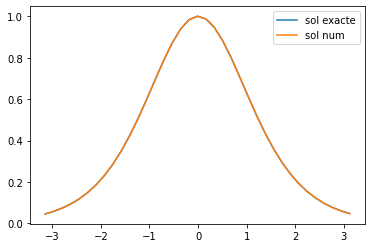

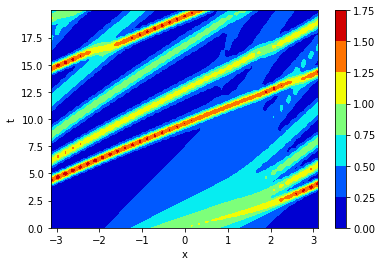

In [9]:
# Leap-frog (Zabusky et Kruskal)
un = np.zeros((Nt, N))
un0 = A/(np.cosh(k*x)**2)
un[0] = un0

un[1] = un0
for i in range(0,N-2):
    un[1][i] = un[0][i] - (dt/(3*dx))*(un[0][i+1]+un[0][i]+un[0][i-1])*(un[0][i+1]-un[0][i-1]) - (dt*delta*delta/(2*dx**3))*(un[0][i+2]-2*un[0][i+1]+2*un[0][i-1]-un[0][i-2])
un[1][N-2] = un[0][N-2] - (dt/(3*dx))*(un[1][N-1]+un[1][N-2]+un[1][N-3])*(un[1][N-1]-un[1][N-3]) - ((dt*delta*delta)/(dx**3))*(un[1][0]-2*un[1][N-1]+2*un[1][N-3]-un[1][N-4])
un[1][N-1] = un[0][N-1] - (dt/(3*dx))*(un[1][0]+un[1][N-1]+un[1][N-2])*(un[1][0]-un[1][N-2]) - ((dt*delta*delta)/(dx**3))*(un[1][1]-2*un[1][0]+2*un[1][N-2]-un[1][N-3])

for j in range(1,Nt-1):
    for i in range(0,N-2):
        un[j+1][i] = un[j-1][i] - (dt/(3*dx))*(un[j][i+1]+un[j][i]+un[j][i-1])*(un[j][i+1]-un[j][i-1]) - ((dt*delta*delta)/(dx**3))*(un[j][i+2]-2*un[j][i+1]+2*un[j][i-1]-un[j][i-2])
    un[j+1][N-2] = un[j-1][N-2] - (dt/(3*dx))*(un[j][N-1]+un[j][N-2]+un[j][N-3])*(un[j][N-1]-un[j][N-3]) - ((dt*delta*delta)/(dx**3))*(un[j][0]-2*un[j][N-1]+2*un[j][N-3]-un[j][N-4])
    un[j+1][N-1] = un[j-1][N-1] - (dt/(3*dx))*(un[j][0]+un[j][N-1]+un[j][N-2])*(un[j][0]-un[j][N-2]) - ((dt*delta*delta)/(dx**3))*(un[j][1]-2*un[j][0]+2*un[j][N-2]-un[j][N-3])

time = 1
plt.plot(x,uexact[time],label='sol exacte')
plt.plot(x,un[time],label='sol num')
plt.legend()
plt.show()

"""
for n in range(0,Nt,int(Nt/100)):
    if n==0: fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,un[n,:])
    plt.scatter(x,uexact[n,:])
    plt.gca().legend(('numerique','exact'))
    plt.gca()
    plt.title('coucou')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)
plt.show()
"""


[xx,tt]=np.meshgrid(x,t)
plt.contourf(xx,tt,un, cmap = 'jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# <font size=5> 4. Analyse des résultats <br> </font>
***